### **自然言語処理**(Natural Language Processing:NLP)

#### &emsp;人間が日常的に使っている自然言語をコンピュータに処理させる一連の技術
##### &emsp;・テキストデータのクレンジングと準備
##### &emsp;・テキスト文書からの特徴量ベクトルの構築
##### &emsp;・映画レビューを肯定的な文と否定的な文に分類する機械学習モデルの訓練
##### &emsp;・アウトオブコア学習に基づく大規模なテキストデータセットの処理
##### &emsp;・文書コレクションからのトピックカテゴリの推定

### 感情分析　(sentiment analysis)

#### &emsp;書き手の意見や感情に基づいて文書を分類するタスク


In [1]:
import pandas as pd
df = pd.read_csv('movie_data.csv', encoding='utf-8')kjjkkk
df.head(3)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0


##### 0： 星が5個以下
##### 1： 星が6個以上

In [2]:
df.shape

(50000, 2)

In [4]:
df['review'][0]  #htmlも含まれる

'In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich famil

In [5]:
df['review'][1]

"OK... so... I really like Kris Kristofferson and his usual easy going delivery of lines in his movies. Age has helped him with his soft spoken low energy style and he will steal a scene effortlessly. But, Disappearance is his misstep. Holy Moly, this was a bad movie! <br /><br />I must give kudos to the cinematography and and the actors, including Kris, for trying their darndest to make sense from this goofy, confusing story! None of it made sense and Kris probably didn't understand it either and he was just going through the motions hoping someone would come up to him and tell him what it was all about! <br /><br />I don't care that everyone on this movie was doing out of love for the project, or some such nonsense... I've seen low budget movies that had a plot for goodness sake! This had none, zilcho, nada, zippo, empty of reason... a complete waste of good talent, scenery and celluloid! <br /><br />I rented this piece of garbage for a buck, and I want my money back! I want my 2 hou

### BoW(Bag-of-Words)

#### &emsp;・テキストを数値の特徴量ベクトルとして表現できる(各文書での各単語の出現回数をもとに分類・評価）
#### &emsp;・単語の順番は考慮しない
#### &emsp;・単語の重みを調整する方法として、TF-IDFがある


In [145]:
# 単語を特徴量ベクトルに変換する
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

count = CountVectorizer() # テキストデータの配列を入力として特徴量ベクトルを作成するインスタンス
docs = np.array([
    'The sun is shining',
    'The weather is sweet',
    'The sun is shining, the weather is sweet, and one and one is two'
])
bag = count.fit_transform(docs)  # 特徴量ベクトルに変換

In [146]:
print(count.vocabulary_)  # アルファベット順にディクショナリに格納

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


In [147]:
print(count.get_feature_names())
print(bag.toarray())
print(bag.toarray().shape)

['and', 'is', 'one', 'shining', 'sun', 'sweet', 'the', 'two', 'weather']
[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]
(3, 9)


#### 特徴量ベクトルにおける値は生の出現頻度とよばれ、tf(t,d)で表される


#### TF-IDF(Term Frequency-Inverse Document Frequency)

##### &emsp;・特徴量ベクトルに頻繁に出現する単語の重みを減らす
##### &emsp;・TF(単語の出現頻度）とIDF（逆文書頻度）の積

##### &emsp;・ndは文書の総数、df（d,t）は単語tを含んでいる文書dの個数
##### &emsp;・対数が使われているのは頻度の低い文書に過剰な重みが与えられないようにするため


$$tf-idf(t, d) = tf(t, d) × idf(t, d)$$

$$idf(t, d) = \log\frac{n_d}{1 + df(d, t)}$$



#### sklearnでは
$$idf(t, d) = \log\frac{1 + n_d}{1 + df(d, t)}$$

$$tf-idf(t, d) = tf(t, d) × (idf(t, d) + 1)$$


$$v_{\text{norm}} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v_{1}^{2} + v_{2}^{2} + \dots + v_{n}^{2}}} = \frac{v}{\big (\sum_{i=1}^{n} v_{i}^{2}\big)^\frac{1}{2}}$$


In [21]:
np.set_printoptions(precision=2)

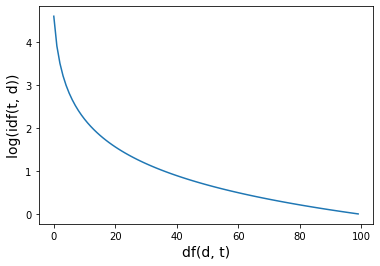

In [15]:
import matplotlib.pyplot as plt
import numpy as np

n_d = 100
d_f = np.arange(0, 100, 1)
idf = np.log(n_d/ (1 + d_f))

plt.plot(df, idf)
plt.xlabel('df(d, t)', fontsize=14)
plt.ylabel('log(idf(t, d))', fontsize=14)
plt.show()

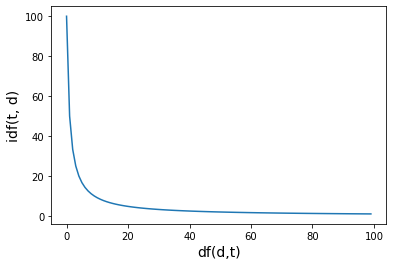

In [16]:
n_d = 100
d_f = np.arange(0, 100, 1)
idf = n_d/ (1 + d_f)

plt.plot(df, idf)
plt.xlabel('df(d,t)', fontsize=14)
plt.ylabel('idf(t, d)', fontsize=14)
plt.show()

In [74]:
docs

array(['The sun is shining', 'The weather is sweet',
       'The sun is shining, the weather is sweet, and one and one is two'],
      dtype='<U64')

In [75]:
print(count.get_feature_names())
print(bag.toarray())

['and', 'is', 'one', 'shining', 'sun', 'sweet', 'the', 'two', 'weather']
[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True,  #デフォルト: True
                         norm='l2',  # デフォルト: L2
                         smooth_idf=True) # すべての文書に出現する単語を0 -> log(1) = 0 (デフォルト: True)

# CountVectorizer で　docs を数値化したあと　tfidf
print(tfidf.fit_transform(count.fit_transform(docs)))


  (0, 6)	0.4337078595086741
  (0, 4)	0.5584778353707552
  (0, 3)	0.5584778353707552
  (0, 1)	0.4337078595086741
  (1, 8)	0.5584778353707552
  (1, 6)	0.4337078595086741
  (1, 5)	0.5584778353707552
  (1, 1)	0.4337078595086741
  (2, 8)	0.191038921512224
  (2, 7)	0.25119322405394995
  (2, 6)	0.296717529270996
  (2, 5)	0.191038921512224
  (2, 4)	0.191038921512224
  (2, 3)	0.191038921512224
  (2, 2)	0.5023864481078999
  (2, 1)	0.44507629390649395
  (2, 0)	0.5023864481078999


In [77]:
print(count.get_feature_names())
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())

['and', 'is', 'one', 'shining', 'sun', 'sweet', 'the', 'two', 'weather']
[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


In [78]:
tf_is = 3  # 出現頻度
n_docs = 3  # 文書総数
d_f = 3 # 単語が含まれる文書数
idf_is = np.log((n_docs+1) / (d_f+1))
tfidf_is = tf_is * (idf_is + 1)
print('tf-idf of term "is" = %.2f' % tfidf_is)

tf-idf of term "is" = 3.00


In [79]:
tf_sun = 1  # 出現頻度
n_docs = 3  # 文書総数
d_f = 2  # 単語が含まれる文書数
idf_sun = np.log((n_docs+1) / (d_f+1))
tfidf_sun = tf_sun * (idf_sun + 1)
print('tf-idf of term "sun" = %.2f' % tfidf_sun)

tf-idf of term "sun" = 1.29


In [80]:
tfidf = TfidfTransformer(use_idf=True, norm=None, smooth_idf=True)  # norm=None にすることで正規化を行わない
raw_tfidf = tfidf.fit_transform(count.fit_transform(docs)).toarray()[-1]
print(count.get_feature_names())
raw_tfidf

['and', 'is', 'one', 'shining', 'sun', 'sweet', 'the', 'two', 'weather']


array([3.39, 3.  , 3.39, 1.29, 1.29, 1.29, 2.  , 1.69, 1.29])

In [81]:
l2_tfidf = raw_tfidf / np.sqrt(np.sum(raw_tfidf**2))
l2_tfidf

array([0.5 , 0.45, 0.5 , 0.19, 0.19, 0.19, 0.3 , 0.25, 0.19])

In [22]:
print(count.get_feature_names())
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())  # TF-IDF

['and', 'is', 'one', 'shining', 'sun', 'sweet', 'the', 'two', 'weather']
[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


In [83]:
print(bag.toarray())  # ｔｆ（countvectorizer)

[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


#### 頻繁に出現する単語だけど、意味のある情報を含んでいなさそうな ’the, and, is' の重みを減らせた

### テキストデータのクレンジング

In [1]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)  # HTMLマークアップを削除
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)  # 正規表現を使って顔文字を検索
    # \Wは英文字、数字、アンダースコア以外の文字を表す（ここでは空白文字に置換）
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

#### HTMLマークアップ、句読点、その他の非英字文字
#### 今回は感情分析なので顔文字だけを残す
#### 大文字と小文字の使い分けに感情分析にとって重要な情報がない前提

https://docs.python.org/ja/3/library/re.html

https://docs.python.org/ja/3/library/html.parser.html

##### ------------------------------------------------
##### re.sub(pattern, repl, string, count=0, flags=0)
##### stiringにpattrenと重複している部分があれば、replで置換される
##### ------------------------------------------------

##### ------------------------------------------------
##### re.findall(pattern, string, flags=0)
##### マッチした部分の文字列のリストを返す
##### ------------------------------------------------


In [3]:
# re.sub()の例
s = 'aaa@xxx.com bbb@yyy.com ccc@zzz.com'

print(re.sub('[a-z]*@', 'ABC@', s))

ABC@xxx.com ABC@yyy.com ABC@zzz.com


In [156]:
# re.findall()の例
s0 = 'aaa@xxx.com, bbb@yyy.com, ccc@zzz.net'

result = re.findall(r'[a-z]+@[a-z]+\.', s0)
print(result)

['aaa@xxx.', 'bbb@yyy.', 'ccc@zzz.']


In [93]:
df.loc[0, 'review'][-50:]

'is seven.<br /><br />Title (Brazil): Not Available'

In [94]:
preprocessor(df.loc[0, 'review'][-50:])

'is seven title brazil not available'

In [38]:
preprocessor("/a>This :) is :( a test :-<)!")

'this is a test :) :( :)'

In [4]:
df['review'][0]  #before

'In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich famil

In [95]:
df['review'] = df['review'].apply(preprocessor)

In [96]:
df['review'][0]

'in 1974 the teenager martha moxley maggie grace moves to the high class area of belle haven greenwich connecticut on the mischief night eve of halloween she was murdered in the backyard of her house and her murder remained unsolved twenty two years later the writer mark fuhrman christopher meloni who is a former la detective that has fallen in disgrace for perjury in o j simpson trial and moved to idaho decides to investigate the case with his partner stephen weeks andrew mitchell with the purpose of writing a book the locals squirm and do not welcome them but with the support of the retired detective steve carroll robert forster that was in charge of the investigation in the 70 s they discover the criminal and a net of power and money to cover the murder murder in greenwich is a good tv movie with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a kennedy the powerful and rich family used their influence to cover the mur

### 文書をトークン化

#### クレンジングした文書を空白文字で区切り、個々の単語に分割する

In [2]:
from nltk.stem.porter import PorterStemmer  # トークン化を実行するためのライブラリ
from nltk.stem.snowball import SnowballStemmer   # トークン化を実行するためのライブラリ


porter = PorterStemmer()  # ワードステミング（単語を原型に変換）
snow = SnowballStemmer(language='english')
def tokenizer(text):  # 空白文字で分割
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

def tokenizer_snowball(text):
    return [snow.stem(word) for word in text.split()]

https://www.nltk.org/

In [33]:
tokenizer('runners like running and thus they run')

['runners', 'like', 'running', 'and', 'thus', 'they', 'run']

In [47]:
tokenizer_porter('runners like running and thus they run')  # thu のように現実に存在しない単語が生成することもある

['runner', 'like', 'run', 'and', 'thu', 'they', 'run']

In [103]:
tokenizer_snowball('runners like running and thus they run')

['runner', 'like', 'run', 'and', 'thus', 'they', 'run']

http://textmining.zcu.cz/publications/inscit20060710.pdf

### ストップワード

#### &emsp;あらゆる種類のテキストで見られるごくありふれた単語
#### &emsp;like, and, is, has
#### &emsp;TF-IDFではなく生の単語の出現頻度か正規化された単語の出現頻度を扱っている場合

In [3]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/otomoryosuke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
[w for w in tokenizer_porter('a runner likes running and runs a lot')[-10:]
    if w not in stop]  # a, and を除去

['runner', 'like', 'run', 'run', 'lot']

In [60]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### 前処理まとめ

#### &emsp;・tf -> 単語を特徴量ベクトルに変換
#### &emsp;・tf-idf -> 特徴量ベクトルに頻出する単語の重みを減らす（and, is, theなど)
#### &emsp;・テキストデータのクレンジング -> HTMLマークアップや不要な文字を削除
#### &emsp;・ワードステミング -> 単語を原型に変換
#### &emsp;・ストップワード　-> ありふれた単語を削除

### 感情分析

#### &emsp;映画レビューを肯定的な文と否定的な文に分類する（positive: １、negative: ０）
#### &emsp;モデル： ロジスティック回帰

* 仮説：
    * 出力ラベル$y=1$の確率の推定モデル：$$p(x;w)=\phi(w_0+w_1x_1+\cdots+w_dx_d), \text{ $\phi(z)$はsigmoid関数}$$
    * 確率の推定値が0.5より大きければ$f(x;w)=1$, 小さければ$f(x;w)=0$と予測する。
    
$$
    % ローマン体にする
    \hat{y} =
        \begin{cases}
            1 \quad \phi(z) \geqq 0.5 \\
            0 \quad \phi(z) < 0.5 \\
        \end{cases}
$$

* 損失関数：交差エントロピー損失
\begin{eqnarray*}
L(w)=\begin{cases}
-\log(p(x;w))\text{ if }y = 1\\
-\log(1-p(x;w))\text{ if }y=0
\end{cases}
\end{eqnarray*}

学習時には、各データポイントに対して交差エントロピー損失を計算し、その平均値が最も小さくなるような1次式を予測器として求める。（正則化項を加えた目的関数を最小化）

In [31]:
import pandas as pd
df = pd.read_csv('movie_data.csv', encoding='utf-8')
df.head(3)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0


In [26]:
word_num = df['review'].apply(lambda x: len(x.split()))

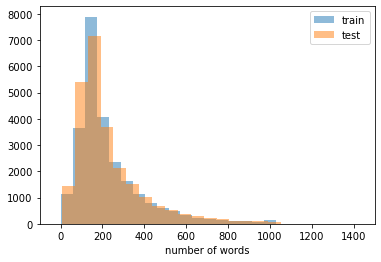

In [27]:
import matplotlib.pyplot as plt

plt.hist(word_num[:25000], label='train', alpha=0.5, bins=40)
plt.hist(word_num[25000:], label='test', alpha=0.5, bins=40)
plt.xlim(-100, 1500)
plt.xlabel('number of words')
plt.legend()
plt.show()

In [44]:
word_num.describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review, dtype: float64

In [32]:
df['sentiment'][25000:].value_counts()

0    12527
1    12473
Name: sentiment, dtype: int64

In [33]:
df['sentiment'][:25000].value_counts()

1    12527
0    12473
Name: sentiment, dtype: int64

In [28]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)  # HTMLマークアップを削除
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)  # 複雑な正規表現を使って顔文字を検索
    # 正規表現 [\W]+ を使って単語の一部ではない文字をすべて削除、テキストを小文字に変換
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [6]:
df['review'] = df['review'].apply(preprocessor)

In [7]:
df['review'][0]

'in 1974 the teenager martha moxley maggie grace moves to the high class area of belle haven greenwich connecticut on the mischief night eve of halloween she was murdered in the backyard of her house and her murder remained unsolved twenty two years later the writer mark fuhrman christopher meloni who is a former la detective that has fallen in disgrace for perjury in o j simpson trial and moved to idaho decides to investigate the case with his partner stephen weeks andrew mitchell with the purpose of writing a book the locals squirm and do not welcome them but with the support of the retired detective steve carroll robert forster that was in charge of the investigation in the 70 s they discover the criminal and a net of power and money to cover the murder murder in greenwich is a good tv movie with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a kennedy the powerful and rich family used their influence to cover the mur

In [8]:
X_train = df.loc[:25000, 'review'].values
y_train = df.loc[:25000, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values


In [132]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [72]:
np.squeeze(np.asarray(np.sum(X_train_cv, axis=0)))

array([103, 328,   1, ...,   1,   1,   1])

In [75]:
X_train_cv.toarray().shape

(25001, 78041)

In [62]:
print(cv.get_feature_names()[:5])
np.squeeze(np.asarray(np.sum(X_train_cv[:5], axis=0)))[:5]

['00', '000', '0000000000001', '00000001', '00015']


array([0, 0, 0, 0, 0])

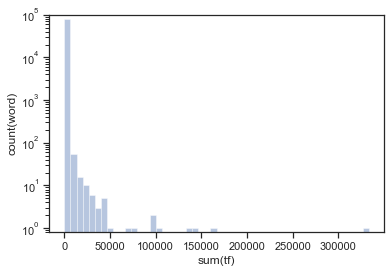

In [155]:
# 単語の出現頻度を可視化
plt.hist(np.squeeze(np.asarray(np.sum(X_train_cv, axis=0))), bins=50, alpha=0.4)
# plt.hist(np.squeeze(np.asarray(np.sum(X_test_cv, axis=0))), bins=50, alpha=0.3)
plt.xlabel('sum(tf)')
plt.ylabel('count(word)')
plt.yscale('log')
plt.ylim(8e-1, 1e5)
plt.show()

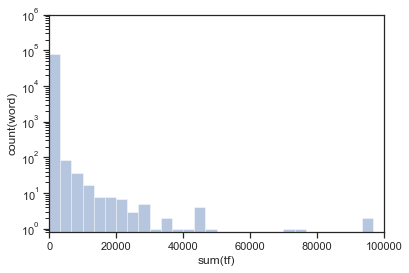

In [158]:
plt.hist(np.squeeze(np.asarray(np.sum(X_train_cv, axis=0))), bins=100, alpha=0.4)
# plt.hist(np.squeeze(np.asarray(np.sum(X_test_cv, axis=0))), bins=50, alpha=0.3)
plt.xlabel('sum(tf)')
plt.ylabel('count(word)')
plt.yscale('log')
plt.xlim(-10, 1e5)
plt.ylim(8e-1, 1e6)
plt.show()

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer  # countvectorizerとTfidfTransformerを置き換え
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(lowercase=False)  # lowercase: Convert all characters to lowercase before tokenizing

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],  # idfなし
               'vect__norm':[None],  # 正規化なし
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},  # 生の単語の出現頻度に基づいて訓練
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0, solver='liblinear'))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',  # (TP + TN)/(FP + FN + TP + TN)
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

In [10]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 27.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
 

In [29]:
print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_.mean())

Best parameter set: {'clf__C': 10.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x7f93b22a30d0>} 
CV Accuracy: 0.897


In [12]:
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.899


In [30]:
pd.DataFrame(gs_lr_tfidf.cv_results_)[['param_clf__C', 'param_clf__penalty', 'param_vect__ngram_range',
       'param_vect__stop_words', 'param_vect__tokenizer',
        'mean_test_score', 'std_test_score',
       'rank_test_score']].sort_values('rank_test_score').head(20)

,param_clf__C,param_clf__penalty,param_vect__ngram_range,param_vect__stop_words,param_vect__tokenizer,mean_test_score,std_test_score,rank_test_score
14,10,l2,"(1, 1)",None,<function tokenizer at 0x7f93b22a30d0>,0.897084,0.002557,1
12,10,l2,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",<function tokenizer at 0x7f93b22a30d0>,0.895164,0.003236,2
15,10,l2,"(1, 1)",None,<function tokenizer_porter at 0x7f93b22a31f0>,0.892004,0.002639,3
22,100,l2,"(1, 1)",None,<function tokenizer at 0x7f93b22a30d0>,0.889925,0.002273,4
4,1,l2,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",<function tokenizer at 0x7f93b22a30d0>,0.889244,0.002902,5
6,1,l2,"(1, 1)",None,<function tokenizer at 0x7f93b22a30d0>,0.888925,0.003846,6
7,1,l2,"(1, 1)",None,<function tokenizer_porter at 0x7f93b22a31f0>,0.887364,0.003714,7
20,100,l2,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",<function tokenizer at 0x7f93b22a30d0>,0.886965,0.003410,8
5,1,l2,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",<function tokenizer_porter at 0x7f93b22a31f0>,0.886925,0.002691,9
13,10,l2,"(1, 1)","[i, me, my, myself, we, our, ours, ourselves, ...",<function tokenizer_porter at 0x7f93b22a31f0>,0.886405,0.002666,10


In [22]:
pd.DataFrame(gs_lr_tfidf.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_clf__C', 'param_clf__penalty', 'param_vect__ngram_range',
       'param_vect__stop_words', 'param_vect__tokenizer', 'param_vect__norm',
       'param_vect__use_idf', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [23]:
pd.DataFrame(gs_lr_tfidf.cv_results_).shape

(48, 20)

#### グリッドサーチによって得られたモデルからテストデータの正解率を算出するとおよそ９０％
#### 標準的なトークナイザ、C=10.0の強さのL2正則化に基づくロジスティック回帰分類器とTF-IDFの組み合わせ
#### Porterステミングもストップワードも使っていない。

### まとめ
#### &emsp;BoWで特徴量ベクトルを作成（tf, tf-idf)
#### &emsp;テキストデータのクレンジング（ポーターステミング、ストップワード、HTMLなど不要な文字を削除）
#### &emsp;ロジスティック回帰による感情分析

In [60]:
gs_lr_tfidf_test.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 13.5min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)], 'vect__norm': [None],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 

In [62]:
print('Best parameter set: %s ' % gs_lr_tfidf_test.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf_test.best_score_.mean())

Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'a

In [ ]:
df_calucurate = np.vstack((X_test, y_test))
# df_calucurate = np.vstack((df_calucurate, clf.predict_proba(X_test)))

df_calucurate = np.vstack((df_calucurate, clf.predict(X_test)))
df_calucurate = np.hstack((df_calucurate.T, clf.predict_proba(X_test)))

In [ ]:
df_add_predict = pd.DataFrame(df_calucurate)

In [ ]:
df_add_predict.columns = ['text', 'y_test', 'y_predict', '0', '1']

In [124]:
import pandas as pd
result_df = pd.read_csv('test_df.csv')

In [86]:
result_df.head()

,text,y_test,y_predict,0,1
0,there s a part of me that would like to give t...,0,0,0.998917,0.001083
1,excellent and moving story of the end of a uni...,1,1,0.006520,0.993480
2,surprisingly well acted well written movie abo...,1,1,0.118769,0.881231
3,what garbage is there actually no part ii if t...,0,0,0.999935,0.000065
4,basically this was obviously designed to be pr...,0,0,0.998238,0.001762


In [87]:
result_df.shape

(25000, 5)

In [96]:
result_df[result_df['y_predict']==result_df['y_test']]['0']

0        0.998917
1        0.006520
2        0.118769
3        0.999935
4        0.998238
           ...   
24994    0.305760
24995    0.999332
24996    0.856490
24997    0.999092
24999    0.013127
Name: 0, Length: 22469, dtype: float64

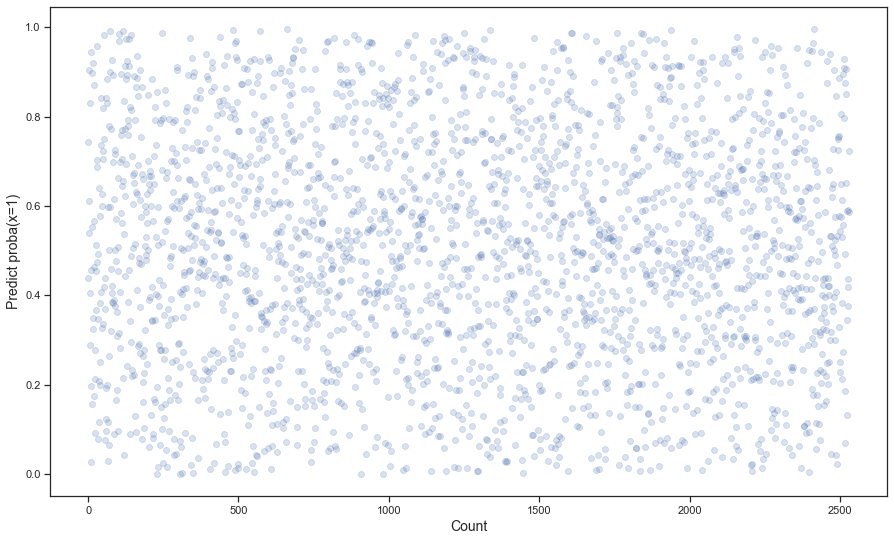

In [114]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 9))
x = np.arange(0, len(result_df[result_df['y_predict']!=result_df['y_test']]), 1)
plt.scatter(x, result_df[result_df['y_predict']!=result_df['y_test']]['1'], alpha=0.2)
plt.ylabel('Predict proba(x=1)', fontsize=14)
plt.xlabel('Count', fontsize=14)

plt.show()

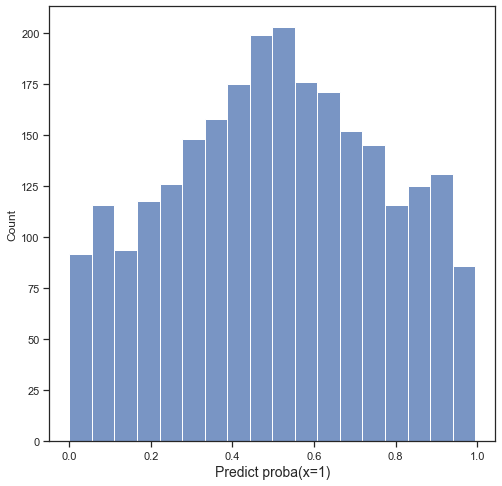

In [125]:
import seaborn as sns
sns.set_theme(style="ticks")
fig = plt.figure(figsize=(8, 8))
sns.histplot(result_df[result_df['y_predict']!=result_df['y_test']]['1'])
plt.xlabel('Predict proba(x=1)', fontsize=14)
plt.show()

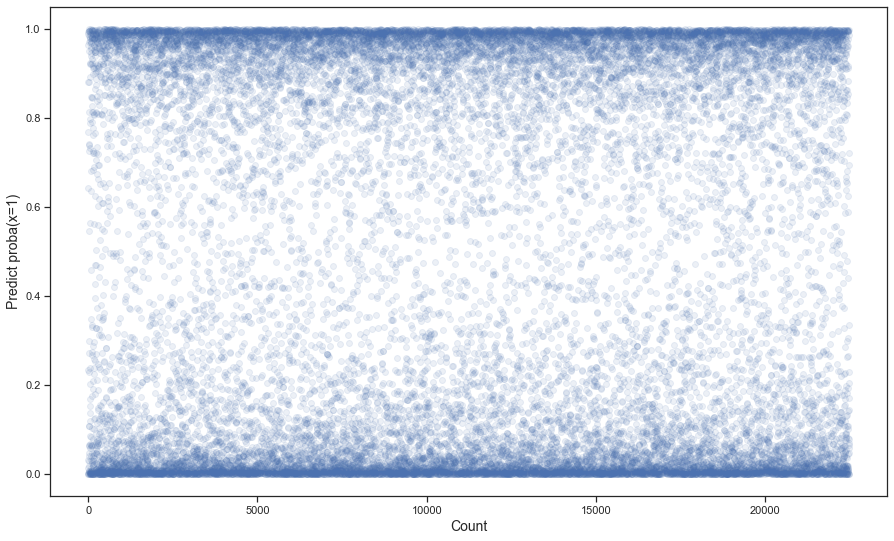

In [122]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 9))

x = np.arange(0, len(result_df[result_df['y_predict']==result_df['y_test']]), 1)
plt.scatter(x, result_df[result_df['y_predict']==result_df['y_test']]['1'], alpha=0.1)
plt.ylabel('Predict proba(x=1)', fontsize=14)
plt.xlabel('Count', fontsize=14)

plt.show()

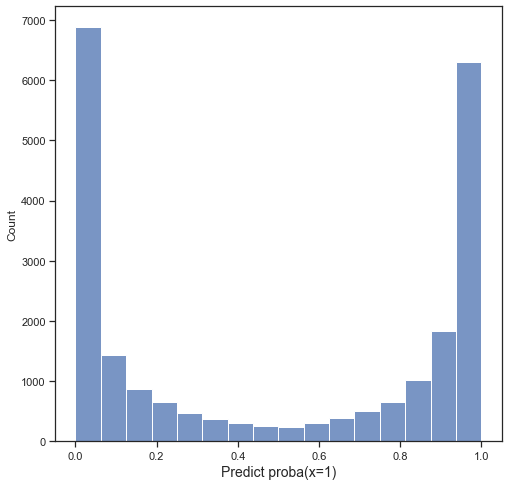

In [119]:
fig = plt.figure(figsize=(8, 8))
sns.histplot(result_df[result_df['y_predict']==result_df['y_test']]['1'])
plt.xlabel('Predict proba(x=1)', fontsize=14)
plt.show()

In [126]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)  # HTMLマークアップを削除
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)  # 複雑な正規表現を使って顔文字を検索
    # 正規表現 [\W]+ を使って単語の一部ではない文字をすべて削除、テキストを小文字に変換
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [127]:
result_df['text_pre'] = result_df['text'].apply(preprocessor)

In [138]:
# cv = CountVectorizer()
# X_train_cv = cv.fit_transform(X_train)
X_result_cv = cv.transform(result_df[result_df['y_predict']!=result_df['y_test']]['text_pre'])

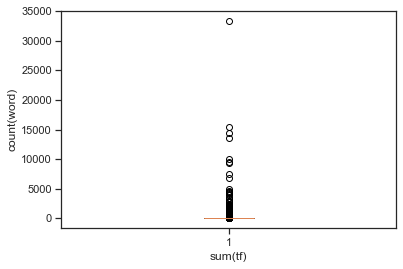

In [143]:
plt.boxplot(np.squeeze(np.asarray(np.sum(X_result_cv, axis=0))))
# plt.hist(np.squeeze(np.asarray(np.sum(X_test_cv, axis=0))), bins=50, alpha=0.3)
# plt.title(u'学習データセットの単語出現頻度の分布', fontproperties=fp)
plt.xlabel('sum(tf)')
plt.ylabel('count(word)')
# plt.yscale('log')
# plt.xlim(-10, 100000)

# plt.ylim(8e-1, 1e6)
plt.show()

https://arxiv.org/pdf/1410.5329.pdf